In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import struct
import sys
from array import array
import itertools
import os
from scipy import signal
from scipy.optimize import curve_fit
import subprocess
import shutil
#from scipy.signal import find_peaks
import pandas as pd
pi = np.pi
clight = 299792458
E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
clight = 299792458

In [3]:
def get_folders(folders,cwd):
    new_folders = []
    for folder in folders:
        if os.path.isdir(os.path.join(cwd,folder)):
            print(folder)
            new_folders.append(folder)
    return new_folders

In [4]:
#os.chdir('/home/txin/Dropbox/code/Cpp/APES_pack/APES8.4/bench/')
working_folder = '/home/txin/Dropbox/code/Cpp/CBI_Iterative/bench/1RF/APES/case1/'
#working_folder = '/media/dataHD/APES_sim_data/CBI/APES/case19_7_scan/'
home0 = os.getcwd()
home1 = os.path.join(home0,working_folder)
cwd = working_folder#os.path.join(home0,working_folder)

In [5]:
folders = os.listdir(cwd);
new_folders = get_folders(folders,cwd);
new_folders = np.sort(new_folders);


#get the starting index in the folder name string that represent the substring of current
i_start_current = new_folders[0].find('Idc')+3

#get the starting index in the folder name string that represent the substring of loading angle
i_start_thetaL = new_folders[0].find('ThetaL1')+6

#get the starting index in the folder name string that represent the sbustring of delay
i_start_delay = new_folders[0].find('delay')+5
##get the starting index in the folder name string that represent the sbustring of gain
i_start_gain = new_folders[0].find('gain')+4


current = [float(folder[folder.find('Idc')+3:folder.find('Idc')+3+4]) for folder in new_folders]
thetaL = [float(folder[folder.find('ThetaL')+6:folder.find('ThetaL')+6+3]) for folder in new_folders]

#delay = [float(folder[folder.find('delay')+5:folder.find('delay')+5+3]) for folder in new_folders]
gain = [float(folder[folder.find('gain')+4:folder.find('gain')+4+3]) for folder in new_folders]


000014000000nmacro1_nBin333_Idc2.50A_ThetaL4.0degree_delay0.000us_gain0.00_0.00
000003000000nmacro1_nBin333_Idc2.50A_ThetaL-7.0degree_delay0.000us_gain0.00_0.00
000001000000nmacro1_nBin333_Idc2.50A_ThetaL-9.0degree_delay0.000us_gain0.00_0.00
000010000000nmacro1_nBin333_Idc2.50A_ThetaL0.0degree_delay0.000us_gain0.00_0.00
000009000000nmacro1_nBin333_Idc2.50A_ThetaL-1.0degree_delay0.000us_gain0.00_0.00
000005000000nmacro1_nBin333_Idc2.50A_ThetaL-5.0degree_delay0.000us_gain0.00_0.00
000017000000nmacro1_nBin333_Idc2.50A_ThetaL7.0degree_delay0.000us_gain0.00_0.00
000008000000nmacro1_nBin333_Idc2.50A_ThetaL-2.0degree_delay0.000us_gain0.00_0.00
000004000000nmacro1_nBin333_Idc2.50A_ThetaL-6.0degree_delay0.000us_gain0.00_0.00
000006000000nmacro1_nBin333_Idc2.50A_ThetaL-4.0degree_delay0.000us_gain0.00_0.00
000019000000nmacro1_nBin333_Idc2.50A_ThetaL9.0degree_delay0.000us_gain0.00_0.00
000011000000nmacro1_nBin333_Idc2.50A_ThetaL1.0degree_delay0.000us_gain0.00_0.00
000007000000nmacro1_nBin333_Idc2.

In [6]:
thetaL1 = np.unique(thetaL)

In [7]:
inputfile = 'input.txt'
temppath = os.path.join(cwd,new_folders[0])
inputfile = os.path.join(temppath,inputfile)
tempinput = {}
with open(inputfile) as inputfile:
    for line in inputfile:
        if len(line.split())>1:
            tempinput[line.split()[0]] = line.split()[1:]
for i in tempinput:
    for j in range(len(tempinput[i])):
        tempinput[i][j] = float(tempinput[i][j])


In [8]:
nRF = int(tempinput['nRF'][0])
nRF1 = int(tempinput['nRF1'][0])
nRF2 = int(tempinput['nRF2'][0])
nRFc = int(tempinput['nRFc'][0])

E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
nTurns = int(tempinput['n_turns'][0])
nDynamic = int(tempinput['n_dynamicOn'][0])
nfill = int(tempinput['n_fill'][0])
n_q_ramp = int(tempinput['n_q_ramp'][0])
NpRF = int(tempinput['N_bins'][0])
h = [int(i) for i in tempinput['h']]
detune_ini = np.array([i for i in tempinput['detune_ini']])
detune_final = np.array([i for i in tempinput['detune_final']])

step = int(tempinput['step_store'][0])
fill_step = int(tempinput['fill_step'][0])
nBeam = int(tempinput['nBeam'][0])
beam_shift = int(tempinput['beam_shift'][0])
nBunch = int(tempinput['n_bunches'][0])
nPar = int(tempinput['Npar'][0])
NperBunch = int(tempinput['NperBunch'][0])
nTot = nBunch*nPar*nBeam
Gamma0 = tempinput['Gamma'][0]
Rring = tempinput['R'][0]
n_record = nTurns/step
clight = 299792458
beta = np.sqrt(1-1/Gamma0**2)
T0 = 2*np.pi*Rring/(clight*beta)
f0 = 1/T0
V0 = [i for i in tempinput['Vref_I']]
V0Q = [i for i in tempinput['Vref_Q']]
II = [i for i in tempinput['Iref_I']]
IQ = [i for i in tempinput['Iref_Q']]
mainRF = int(tempinput['mainRF'][0])
t_rad_long = tempinput['t_rad_long'][0]
if int(tempinput['type'][0]==2):
    atomicZ = 79
    Ek = Gamma0*E0Au
else:
    atomicZ =1
if int(tempinput['type'][0]==1):  
    Ek = Gamma0*E0Elec
    
GMTSQ = tempinput['GMTSQ'][0]
Ek_damp = tempinput['Ek_damp'][0]

eta = 1/GMTSQ-1/Gamma0**2
if nRF ==1:
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))
elif nRF == 2 :
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1])*eta/(2*np.pi*Ek))

omegarf = 2*np.pi*(np.array(h)*f0)
omegac = 2*np.pi*(np.array(h)*f0+detune_final)
Trf = 2*np.pi/omegarf
RoQ = [i for i in tempinput['RoQ']]
QL = [i for i in tempinput['QL']]
R = [RoQ[i]*QL[i] for i in range(nRF)]

Th = 2*np.pi/omegarf[0]
dthat =Th/NpRF

pattern = 'd'+'dd'*nBeam+3*nRF*'d'
n_stride = 1+2*nBeam+3*nRF
stride = len(pattern)*8
test = array('d')
bucket_height = 2*Qs/(h[mainRF]*eta)


print(Qs)
print(bucket_height)

0.05
0.0148960608573


In [9]:
# iterative solver
def Zparallel(Rsh, QL, omega0, omega,gain):
    return Rsh/(1+gain)*omega/(omega+1j*QL/(1+gain)*(omega0-omega**2/omega0)) # using the convention from A. Chao's book

r0 = (1*1.6e-19)**2/(1*9.10938356e-31*3e8*3e8)
sigz = 7e-3 # rms bunch length
sigt = sigz/clight
sigPhi = 2*pi*f0*sigt
pmax = 1*100 # number of samples in frequency domain

N_mode = 2 # number of Coupled bunch mode to look
mu_danger = 0 # the mode we think is the most dangers
mus = np.array([i for i in range(N_mode)])

N_m = 2 # number of longitudinal modes ( 1 means dipole, 2 means quadruple)
ms = np.array([i for i in range(N_m)])

omegas = Qs*f0*2*pi
ps = np.array([float(i) for i in range(-pmax,pmax+1)])
p_M_omega0 = ps*nBunch*2*np.pi*f0
print("fs = ",omegas/2/pi)
omegas = Qs*2*pi*f0

N_thetaL1 = len(thetaL1)
N_thetaL2 = 1#len(thetaL2)

delta_omega_Re_Iter = np.ndarray([N_m,N_mode,N_thetaL1,N_thetaL2])
delta_omega_Im_Iter = np.ndarray([N_m,N_mode,N_thetaL1,N_thetaL2])

N_OMEGA_guss = 150
phistart = -75/180*pi
phiend = 75/180*pi
dphi = (phiend-phistart)/N_OMEGA_guss
OMEAG_ini = [omegas*np.exp(1j*phistart)*np.exp(1j*i*dphi) for i in range(N_OMEGA_guss)]

m = 1

def F(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi):
    omega0 = f0*2*pi
    fact = np.math.factorial(m-1)
    nMmu = ps*nBunch+mu
    omegasamp = ((ps*nBunch+mu)*2*np.pi*f0+Omega)
    Zs = np.array([Zparallel(R[i],QL[i],omegac[i],omegasamp,gain) for i in range(nRF)])
    factor = nBunch*NperBunch*r0*eta/(Gamma0*T0**2)/T0*4*pi*(m/fact)/(2**m)*sigPhi**(2*m-2)
    return (Omega**2-(1j*factor*np.sum((omegasamp/omega0)**(2*m-1)*Zs*np.exp(-nMmu**2*sigPhi**2))+(Qs*f0*2*pi)**2))/(Qs*f0*2*pi)**2

def SolveOmega(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,maxIter,accu,gain,sigPhi):
    nIter = 0
    maxstep = 1000
    # initial values
    OmegaR = np.real(Omega)
    OmegaI = np.imag(Omega)
    Omegat1 = Omega
    Omegat2 = Omegat1
    # step size
    sig1 = 1e-7
    sig2 = 1e-7*1j
    Err = F(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi)
    Err_store = Err
    while(np.abs(Err)>accu and nIter<maxIter):
        OmegaR = np.real(Omega)
        OmegaI = np.imag(Omega)
        Omegat1 = Omega
        Err = F(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi)
        F1 = F(Omega+sig1,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi) # change OmegaRe by a small step
        F2 = F(Omega+sig2,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi) # change OmegaIm by a small step
        Fre = np.real(Err)
        Fim = np.imag(Err)
        F1re = np.real(F1)
        F1im = np.imag(F1)
        F2re = np.real(F2)
        F2im = np.imag(F2)
        # approximate the Jacobian
        dF11 = (F1re-Fre)/np.abs(sig1)
        dF12 = (F2re-Fre)/np.abs(sig1)
        dF21 = (F1im-Fim)/np.abs(sig2)
        dF22 = (F2im-Fim)/np.abs(sig2)
        
        det = dF11*dF22-dF12*dF21
        # inverse the Jacobian
        dF11inv = dF22/det
        dF12inv = -dF12/det
        dF21inv = -dF21/det
        dF22inv = dF11/det
        dFR = Fre*dF11inv+Fim*dF12inv
        if dFR >maxstep:
            OmegaR -= maxstep
        else:
            OmegaR -= dFR
        dFI = Fre*dF21inv+Fim*dF22inv
        if dFI > maxstep:
            OmegaI -= maxstep
        else:
            OmegaI -= dFI
        
        Omega = OmegaR+OmegaI*1j
        nIter += 1
        #if np.abs(Omega-Omegat2) < 1e-7:
        #    print("Omega  : ", Omega)
        #    print("Omega1 : ", Omegat1)
        #    print("Omega2 : ", Omegat2)
        #    print("Err    : ", Err)
        #    Omega=(Omegat2+Omegat1)/2
        #else:
        #    Omegat2 = Omegat1
        
        Err_store = Err
    if nIter == maxIter:
        print("Maxed out!","...","Err = ",Err)
        print("OMEGA = ",Omega)
        return 1-1e100*1j
    #print(np.abs(Err))
    return Omega
    print(Omega)
    print(nIter)

fs =  3909.81441814


In [10]:
# Iteratively solve:

inputfn = 'input.txt'
for m in ms:
    for mu in mus:
        qidx=0
        for folder in new_folders[:]:
            print(folder)
            os.chdir(os.path.join(home1,folder))
            cwd = os.getcwd()
            inputfile = os.path.join(cwd,inputfn)
            tempinput = {}
            with open(inputfile) as inputfile:
                for line in inputfile:
                    if len(line.split())>1:
                        tempinput[line.split()[0]] = line.split()[1:]
            for i in tempinput:
                for j in range(len(tempinput[i])):
                    tempinput[i][j] = float(tempinput[i][j])
            nRF = int(tempinput['nRF'][0])
            nRF1 = int(tempinput['nRF1'][0])
            nRF2 = int(tempinput['nRF2'][0])
            nRFc = int(tempinput['nRFc'][0])

            nTurns = int(tempinput['n_turns'][0])
            nfill = int(tempinput['n_fill'][0])
            n_q_ramp = int(tempinput['n_q_ramp'][0])
            NpRF = int(tempinput['N_bins'][0])
            h = [int(i) for i in tempinput['h']]
            detune_ini = np.array([i for i in tempinput['detune_ini']])
            detune_final = np.array([i for i in tempinput['detune_final']])

            step = int(tempinput['step_store'][0])
            fill_step = int(tempinput['fill_step'][0])
            nBeam = int(tempinput['nBeam'][0])
            beam_shift = int(tempinput['beam_shift'][0])
            nBunch = int(tempinput['n_bunches'][0])
            nPar = int(tempinput['Npar'][0])
            NperBunch = int(tempinput['NperBunch'][0])
            nTot = nBunch*nPar*nBeam
            Gamma0 = tempinput['Gamma'][0]
            Rring = tempinput['R'][0]
            n_record = nTurns/step
            beta = np.sqrt(1-1/Gamma0**2)
            T0 = 2*np.pi*Rring/(clight*beta)
            f0 = 1/T0
            V0 = [i for i in tempinput['Vref_I']]
            V0Q = [i for i in tempinput['Vref_Q']]
            II = [i for i in tempinput['Iref_I']]
            IQ = [i for i in tempinput['Iref_Q']]
            mainRF = int(tempinput['mainRF'][0])
            Pbeam = tempinput['Prad'][0]
            if int(tempinput['type'][0]==2):
                atomicZ = 79
                Ek = Gamma0*E0Au
            else:
                atomicZ =1
            if int(tempinput['type'][0]==1):  
                Ek = Gamma0*E0Elec

            GMTSQ = tempinput['GMTSQ'][0]
            Ek_damp = tempinput['Ek_damp'][0]

            eta = 1/GMTSQ-1/Gamma0**2
            if nRF ==1:
                Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))
            elif nRF == 2 :
                Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1])*eta/(2*np.pi*Ek))
            print("Qs: ",Qs)
            omegarf = 2*np.pi*(np.array(h)*f0)
            omegac = 2*np.pi*(np.array(h)*f0+detune_final)
            #omegac = omegac+np.array([200*2*pi,0])
            Trf = 2*np.pi/omegarf
            RoQ = [i for i in tempinput['RoQ']]
            QL = [i for i in tempinput['QL']]
            R = [RoQ[i]*QL[i] for i in range(nRF)]

            Th = 2*np.pi/omegarf[0]
            dthat =Th/NpRF

            pattern = 'd'+'dd'*nBeam+3*nRF*'d'
            n_stride = 1+2*nBeam+3*nRF
            stride = len(pattern)*8
            test = array('d')
            print("dfc: ",omegac/2/pi-f0*h[0])
            print("NperBunch: ",NperBunch/1e11)
            print("nBunch: ",nBunch)

            #print("QL: ",QL)
            #print("R: ",R)
            maxOMEGAIM = -1e360            
            print("Current mode : ",m+1,',',mu)

            for Omega in OMEAG_ini:
                t_omega = Omega*1.0
                temp = SolveOmega(Omega,ps,nBunch-mu,m+1,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,10000,1e-6,gain[qidx],sigPhi)
                if np.imag(temp)>maxOMEGAIM:
                    #print("Found a bigger one : ",t_omega,np.arctan(np.imag(t_omega)/np.real(t_omega))/pi*180)
                    print("Found a bigger one : ",temp)
                    maxOMEGAIM = np.imag(temp)
                    delta_omega_Re_Iter[m][mu][int(qidx/N_thetaL2)][qidx%N_thetaL2] = np.real(temp)
                    delta_omega_Im_Iter[m][mu][int(qidx/N_thetaL2)][qidx%N_thetaL2] = np.imag(temp)
            print("---------------------")
            print(qidx,';',(delta_omega_Re_Iter[m][mu][int(qidx/N_thetaL2)][qidx%N_thetaL2]-omegas)/2/pi,delta_omega_Im_Iter[m][mu][int(qidx/N_thetaL2)][qidx%N_thetaL2])
            print("---------------------")
            qidx+=1


000000000000nmacro1_nBin333_Idc2.50A_ThetaL-10.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-19196.24063283]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  1 , 0
Found a bigger one :  (0.00266056862477-6916.74936187j)
Found a bigger one :  (0.00202327260449-6916.74564401j)
Found a bigger one :  (0.00567679565241-6916.74395214j)
Found a bigger one :  (-0.00271241743853+5139.72092346j)
Found a bigger one :  (0.00945692788243+5139.72573529j)
Found a bigger one :  (0.0147205673128+5139.73534531j)
Found a bigger one :  (0.0148466562051+5139.73546897j)
---------------------
0 ; -3909.81205522 5139.73546897
---------------------
000001000000nmacro1_nBin333_Idc2.50A_ThetaL-9.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-19321.34517914]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  1 , 0
Found a bigger one :  (0.00292027987428-6584.27468052j)
Found a bigger one :  (-0.0544987000849-6584.22361361j)
Found a bigger one :  (-0.0064957782279+4838.18316365j)
Found a big

Found a bigger one :  (2253.71799868-725.868131136j)
---------------------
12 ; -3551.12405831 -725.868131136
---------------------
000013000000nmacro1_nBin333_Idc2.50A_ThetaL3.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-20791.09311295]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  1 , 0
Found a bigger one :  (2878.91763572-714.574230144j)
Found a bigger one :  (2878.91885168-714.57377568j)
Found a bigger one :  (2878.91894384-714.57303075j)
Found a bigger one :  (2878.91904813-714.572174716j)
Found a bigger one :  (2878.90011418-714.55919855j)
Found a bigger one :  (2878.89221779-714.553129809j)
---------------------
13 ; -3451.62449105 -714.553129809
---------------------
000014000000nmacro1_nBin333_Idc2.50A_ThetaL4.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-20913.24425352]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  1 , 0
Found a bigger one :  (3386.55966407-703.118258556j)
Found a bigger one :  (3386.55142895-703.105715676j)
Found a bigger one

Found a bigger one :  (25441.5082434+98.6741816217j)
Found a bigger one :  (25441.5082502+98.6741827096j)
Found a bigger one :  (25441.5082531+98.6741831422j)
Found a bigger one :  (25441.508258+98.6741839128j)
Found a bigger one :  (25441.5082675+98.6741840379j)
Found a bigger one :  (25441.508423+98.6742051409j)
---------------------
7 ; 139.327407091 98.6742051409
---------------------
000008000000nmacro1_nBin333_Idc2.50A_ThetaL-2.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-20182.19581044]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  1 , 1
Found a bigger one :  (25448.3339553+99.4458205294j)
Found a bigger one :  (25448.3339558+99.4458206142j)
Found a bigger one :  (25448.3339917+99.4458261721j)
Found a bigger one :  (25448.3340077+99.4458286071j)
Found a bigger one :  (25448.3340321+99.4458308799j)
Found a bigger one :  (25448.3340855+99.4458406489j)
---------------------
8 ; 140.413745031 99.4458406489
---------------------
000009000000nmacro1_nBin333_Idc2.50A_T

---------------------
1 ; -9.84822546348 -3.27350033965
---------------------
000002000000nmacro1_nBin333_Idc2.50A_ThetaL-8.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-19445.75986254]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  2 , 0
Found a bigger one :  (24504.4940836-3.21084761202j)
Found a bigger one :  (24504.4940843-3.2108466243j)
Found a bigger one :  (24504.494084-3.21084564137j)
Found a bigger one :  (24504.4940899-3.21084233925j)
Found a bigger one :  (24504.494086-3.21084167582j)
---------------------
2 ; -9.8030563908 -3.21084167582
---------------------
000003000000nmacro1_nBin333_Idc2.50A_ThetaL-7.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-19569.56558514]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  2 , 0
Found a bigger one :  (24504.7730208-3.15007057403j)
Found a bigger one :  (24504.7730213-3.15006985051j)
Found a bigger one :  (24504.7730214-3.15006977835j)
Found a bigger one :  (24504.7730214-3.15006977549j)
Found a bigger one 

Found a bigger one :  (24508.0696123-2.49005108759j)
---------------------
16 ; -9.23399369432 -2.49005108759
---------------------
000017000000nmacro1_nBin333_Idc2.50A_ThetaL7.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-21281.79372925]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  2 , 0
Found a bigger one :  (24508.3051716-2.44686356065j)
Found a bigger one :  (24508.3051722-2.44686283161j)
Found a bigger one :  (24508.3051769-2.44685941546j)
Found a bigger one :  (24508.3051737-2.44685768214j)
---------------------
17 ; -9.19650294255 -2.44685768214
---------------------
000018000000nmacro1_nBin333_Idc2.50A_ThetaL8.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-21405.59887499]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  2 , 0
Found a bigger one :  (24508.5390641-2.4044816545j)
Found a bigger one :  (24508.5390646-2.4044809575j)
Found a bigger one :  (24508.5390675-2.40447879196j)
Found a bigger one :  (24508.5390677-2.4044775297j)
------------------

Found a bigger one :  (24552.1963175+0.351566144824j)
---------------------
12 ; -2.21101044297 0.351566144824
---------------------
000013000000nmacro1_nBin333_Idc2.50A_ThetaL3.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-20791.09311295]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  2 , 1
Found a bigger one :  (24552.2200694+0.354339947656j)
Found a bigger one :  (24552.2200694+0.354339948255j)
Found a bigger one :  (24552.2200695+0.354339966217j)
Found a bigger one :  (24552.2200695+0.35433996946j)
---------------------
13 ; -2.20723019696 0.35433996946
---------------------
000014000000nmacro1_nBin333_Idc2.50A_ThetaL4.0degree_delay0.000us_gain0.00_0.00
Qs:  0.05
dfc:  [-20913.24425352]
NperBunch:  3.16740012699
nBunch:  630
Current mode :  2 , 1
Found a bigger one :  (24552.2439314+0.357133296662j)
Found a bigger one :  (24552.2439314+0.357133297261j)
Found a bigger one :  (24552.2439316+0.357133325933j)
---------------------
14 ; -2.20343242264 0.357133325933
-----

In [11]:
os.chdir(working_folder)
for m in ms:
    for mu in mus:
        pd.DataFrame(delta_omega_Im_Iter[m][mu]).to_csv("OmegaIM_"+str(m)+'_'+str(mu)+'.txt')
        pd.DataFrame(delta_omega_Re_Iter[m][mu]).to_csv("OmegaRE_"+str(m)+'_'+str(mu)+'.txt')

In [12]:
QL

[56520.538659366175]

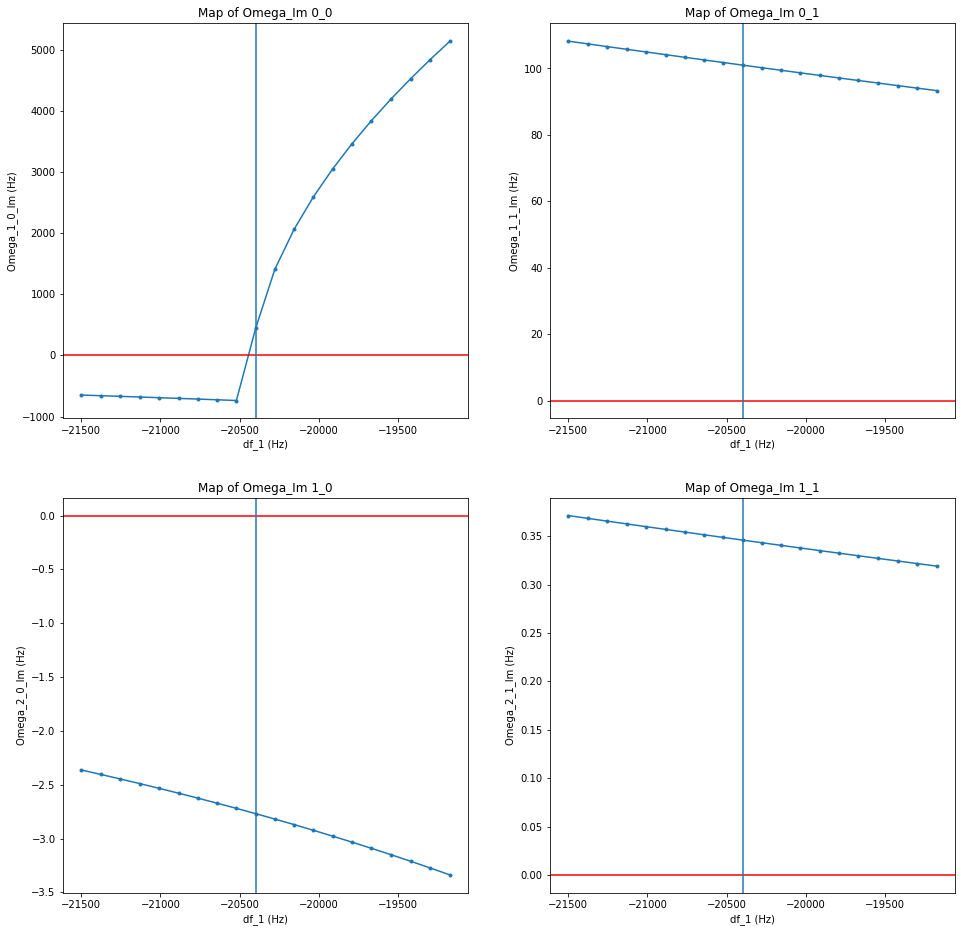

In [13]:
IbDC = 1.6e-19*nBunch*NperBunch*f0
R = np.array(RoQ)*np.array(QL)
Vbr = IbDC*2*R
phis = np.abs(np.arctan(np.array(V0)/np.array(V0Q)))
Vc = np.sqrt(np.array(V0Q)**2+np.array(V0)**2)
f = f0*h[0]
df1 = -(Vbr*np.sin(phis)/Vc+np.tan(thetaL1/180*pi)*(1+Vbr/Vc*np.cos(phis)))*f/2/QL
df1_opt = -(Vbr*np.sin(phis)/Vc+np.tan(0/180*pi)*(1+Vbr/Vc*np.cos(phis)))*f/2/QL
fig1,axes1 = plt.subplots(N_m,N_mode)
fig1.set_figheight(8*N_mode)
fig1.set_figwidth(8*N_m)

damp = 1/t_rad_long*1
for m in ms:
    for mu in mus:
        axes1[m][mu].plot(df1,pd.DataFrame(delta_omega_Im_Iter[m][mu])-damp,'.-')
        axes1[m][mu].set_title("Map of Omega_Im "+str(m)+'_'+str(mu))
        axes1[m][mu].set_ylabel('Omega_'+str(m+1)+'_'+str(mu)+'_Im (Hz)',fontsize=10)
        axes1[m][mu].set_xlabel('df_1 (Hz)',fontsize=10)
        axes1[m][mu].axhline(y=0,color='r')
        axes1[m][mu].axvline(x=df1_opt)
fn_stab = os.path.join(cwd,'stability_map.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

In [48]:
R

array([29632392.6719072])

In [49]:
RoQ

[1022.0]

In [50]:
V0

[22812782.9976]

In [51]:
V0Q

[-3600000.0]

In [52]:
df1

array([110095.12561445,  41340.30106029,  70638.40872817, 212121.68787188,
        51557.40755171,  77723.36870485, -74030.8909001 ,  58583.79257943,
        88103.61089311,  19992.91071985,  64513.03540066, 109033.16008146,
        40922.4599082 ,  70442.27822188, 203056.96170141,  51302.70209647,
        77468.66324961, -83095.61707056,  58387.66207315,  87685.76974102])

In [55]:
phis

array([1.41428077])